In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from utils import get_data


In [ ]:
# Assuming get_data is a function that returns the data in the correct format.
Xs, ys = get_data('ES', [1])

X = Xs[0]  # Assuming X is a 2D numpy array
y = ys[0].reshape(-1, 1)  # Reshaping y to be a 2D column vector

split_idx = int(len(X) * 0.8)

X_train = X[:split_idx]
y_train = y[:split_idx]
X_test = X[split_idx:]
y_test = y[split_idx:]

# Automatically find the best SARIMA order using auto_arima
stepwise_model = auto_arima(y_train,
                             exogenous=X_train,
                             seasonal=True,
                             m=7 * 24,  # weekly seasonality, assuming hourly data for a week
                             stepwise=True,
                             suppress_warnings=True,
                             error_action="ignore",
                             trace=True)

# Extract the best order and seasonal order
order = stepwise_model.order
seasonal_order = stepwise_model.seasonal_order

# Fit SARIMAX model using the best order and seasonal order
model = SARIMAX(y_train,
                exog=X_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast
forecast = results.predict(start=len(X_train), end=len(X_train) + len(y_test) - 1, exog=X_test)

# Evaluate the model
mse = mean_squared_error(y_test, forecast)
print(f"Test MSE: {mse:.2f}")

/Users/vimohr/ETH_Datathon_2025/utils.py:48: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_index = pd.date_range(start=historical_data.index.min(),
/Users/vimohr/ETH_Datathon_2025/utils.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col_name] = new_df[base_col].shift(lag)
/Users/vimohr/ETH_Datathon_2025/utils.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col_name] = new_df[base_col].shift(lag)
/Users/vimohr/ETH_Datathon_2025/utils.py:121

Performing stepwise search to minimize aic


/Users/vimohr/ETH_Datathon_2025/utils.py:36: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_index = pd.date_range(start=historical_data.index.min(),
/Users/vimohr/ETH_Datathon_2025/utils.py:48: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_index = pd.date_range(start=historical_data.index.min(),


False False
               0      1    2            3     4         5         6   \
0        0.001696  0.004  0.0     0.000000   9.6  0.001764  0.001548   
1        0.001648  0.004  0.0     0.000000   9.5  0.001696  0.001484   
2        0.001608  0.004  0.0     0.000000   9.1  0.001648  0.001460   
3        0.001584  0.004  0.0     0.000000   8.8  0.001608  0.001448   
4        0.001584  0.004  0.0     0.000000   8.5  0.001584  0.001476   
...           ...    ...  ...          ...   ...       ...       ...   
1211061  0.039328  0.029  0.0  9875.634729  32.6  0.040328  0.039328   
1211062  0.039328  0.028  0.0  5074.263796  31.2  0.039328  0.039328   
1211063  0.039328  0.027  0.0   269.250233  29.3  0.039328  0.039328   
1211064  0.039328  0.026  0.0     0.000000  27.8  0.039328  0.039328   
1211065  0.040328  0.026  0.0     0.000000  26.8  0.039328  0.040328   

               7         8     9     10    11    12            13  \
0        0.001436  0.001476   9.7  10.3  10.3   8.9   

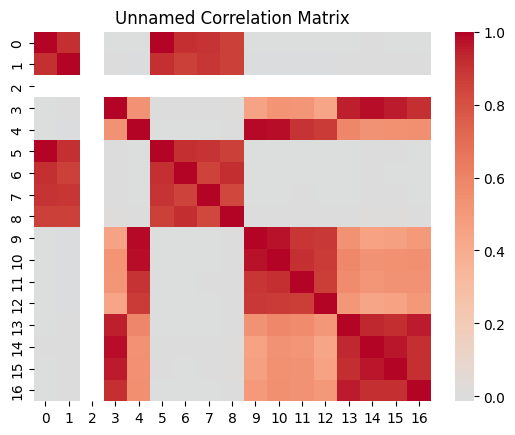

In [ ]:
Xs, ys = get_data('ES')

X = np.vstack([x for x in Xs])
y = np.hstack([y for y in ys])

print(np.isnan(X).any(), np.isnan(y).any())
dX = pd.DataFrame(X)
dy = pd.DataFrame(y)

print(dX)
corr_matrix = dX.corr()

print(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Unnamed Correlation Matrix")
plt.show()


In [ ]:
# Define target and exogenous variables
y = df['demand']
exog = df[['temperature', 'holiday', 'production', 'demand_lag1', 'demand_lag7']]

# Train-test split (e.g., last 20% as test)
split_idx = int(len(df) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]
exog_train, exog_test = exog[:split_idx], exog[split_idx:]

# Automatically find best SARIMA order using auto_arima
stepwise_model = auto_arima(y_train,
                             exogenous=exog_train,
                             seasonal=True,
                             m=7,  # weekly seasonality
                             stepwise=True,
                             suppress_warnings=True,
                             error_action="ignore",
                             trace=True)

# Extract best order and seasonal order
order = stepwise_model.order
seasonal_order = stepwise_model.seasonal_order

# Fit SARIMAX model
model = SARIMAX(y_train,
                exog=exog_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast
forecast = results.predict(start=y_test.index[0], end=y_test.index[-1], exog=exog_test)

# Evaluation
mse = mean_squared_error(y_test, forecast)
print(f"Test MSE: {mse:.2f}")

In [ ]:
# Plot results
plt.figure(figsize=(14,6))
plt.plot(y_train[-60:], label='Train')
plt.plot(y_test, label='Test')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("Energy Demand Forecast")
plt.show()